In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
ls


audioFeatureExtraction.ipynb  model.ipynb
best_model.keras              pca.ipynb
best_model.pth                pytorchModel.ipynb
firstTT.ipynb                 testModel.ipynb
manualSplittingAudio.ipynb    testmelspect.ipynb


In [3]:
pip install pandas numpy matplotlib scipy scikit-learn hmmlearn simplejson eyed3 pydub

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install pyAudioAnalysis



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 13.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyAudioAnalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41264371 sha256=0e5bd7a6c9686aff5577af55b25dc9d931538c0e53020803ab2db81c84baa08a
  Stored in directory: /Users/ashutosh/Library/Caches/pip/wheels/24/9e/ab/d18e8a5866e4b4edfc012d6576e5ed699dd2aa4acbab8e8c90
Successfully built pyAudioAnalysis


In [5]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 12.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
from pyAudioAnalysis import audioTrainTest as aT
# aT.featureAndTrain(["classifierData/music","classifierData/speech"], 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmSMtemp", False)
# aT.fileClassification("bangarang.mp3", "svmSMtemp","svm")

In [ ]:
file_path = "/Users/ashutosh/GoogleDrive"
with open(file_path, 'r') as file:
    data = file.read()


In [4]:
import os

# Path to directory containing audio files
audioFilePath = r"C:\Users\ashut\Desktop\edm subgenre\TEST\AFROHOUSE"

# Check if the directory exists
if not os.path.exists(audioFilePath):
    raise FileNotFoundError(f"Directory not found at {audioFilePath}")

# Get a list of all files in the directory
audioFiles = [f for f in os.listdir(audioFilePath) if os.path.isfile(os.path.join(audioFilePath, f))]

# Check if there are any files in the directory
if len(audioFiles) == 0:
    raise FileNotFoundError(f"No audio files found in {audioFilePath}")
else:
    print(f"Found {len(audioFiles)} audio file(s) in {audioFilePath}")
    print("\nAudio files:", audioFiles)

Found 40 audio file(s) in C:\Users\ashut\Desktop\edm subgenre\TEST\AFROHOUSE

Audio files: ['Mr Afro Deep - Abdel Kader - HunterSynth (Extended Edit).mp3', 'Mr Afro Deep - Afro Pupo - Gálaktos.mp3', 'Mr Afro Deep - Anderson Marío - Pai (Dj Taison Remix).mp3', 'Mr Afro Deep - Auguste & Kreative Nativez ft. Antonio Lyons - I Have a Confession.mp3', 'Mr Afro Deep - BryD4D & Frank GP - Khombo Ra Mina.mp3', 'Mr Afro Deep - Buddynice - Abalele.mp3', 'Mr Afro Deep - DarkFace - Fuego nos Quema.mp3', 'Mr Afro Deep - DarkFace - Tingate.mp3', 'Mr Afro Deep - DeepSoul ft. Mfura MusiQ & FubudaDj - Love & Light.mp3', 'Mr Afro Deep - Dj Nar SA - Demons.mp3', 'Mr Afro Deep - Drake ft. Rihanna - Take Care.mp3', 'Mr Afro Deep - Drumetic Boyz - Kemet (Flute Mix) (ft. Arasoulsax).mp3', 'Mr Afro Deep - DysFonik ft. Odarka - I Tried (Da Jose_s Sage Bootleg).mp3', 'Mr Afro Deep - ExFx - Dust.mp3', 'Mr Afro Deep - Fear Lez - Guru.mp3', 'Mr Afro Deep - Ginton & Idd Aziz - Mia Pembe.mp3', 'Mr Afro Deep - Hlokwa

TEST FILE PROCESSING

In [6]:
''' 
Procesing for the TEST folder files


'''

import os
import numpy as np
import pandas as pd
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures

# Define the root folder containing subfolders of audio files
rootFolder = r"C:\Users\ashut\Desktop\edm subgenre\TEST"

# Prepare a list to hold data for all audio files
all_data = []

# Iterate over each subfolder and file in the root folder
for subfolder, dirs, files in os.walk(rootFolder):
    genre = os.path.basename(subfolder)  # Use the subfolder name as the genre
    for file in files:
        if file.endswith(".mp3"):  # Only process .mp3 files
            audioFilepath = os.path.join(subfolder, file)
            print(f"Processing file: {audioFilepath}")

            # Read audio file
            [Fs, x] = audioBasicIO.read_audio_file(audioFilepath)
            if x.size == 0:
                print(f"Warning: Skipping empty audio file {audioFilepath}")
                continue

            # Convert stereo to mono
            x = audioBasicIO.stereo_to_mono(x)

            # Extract short-term features
            F, f_name = ShortTermFeatures.feature_extraction(x, Fs, 0.050 * Fs, 0.025 * Fs)

            # Calculate the means of the features
            feature_means = {name: F[i, :].mean() for i, name in enumerate(f_name)}

            # Add genre and file name to the feature dictionary
            feature_means['Genre'] = genre
            feature_means['File Name'] = file

            # Append the data to the list
            all_data.append(feature_means)

# Create a DataFrame from the list of feature data
df = pd.DataFrame(all_data)

# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.15f}'.format)

# Save the DataFrame to an Excel file
output_filepath = r"C:\Users\ashut\Desktop\edm_subgenre_features_all.xlsx"
df.to_excel(output_filepath, index=False)

print(f"Features for all audio files saved to {output_filepath}")


Features saved to C:\Users\ashut\Desktop\edm_subgenre_features.xlsx


TRAIN FILE PROCESSING

In [2]:
''' 
Procesing for the TRAIN folder files


'''

# Define the root folder containing subfolders of audio files
rootFolder = r"C:\Users\ashut\Desktop\edm subgenre\TRAIN"

# Prepare a list to hold data for all audio files
all_data = []

# Iterate over each subfolder and file in the root folder
for subfolder, dirs, files in os.walk(rootFolder):
    genre = os.path.basename(subfolder)  # Use the subfolder name as the genre
    for file in files:
        if file.endswith(".mp3"):  # Only process .mp3 files
            audioFilepath = os.path.join(subfolder, file)
            print(f"Processing file: {audioFilepath}")

            # Read audio file
            [Fs, x] = audioBasicIO.read_audio_file(audioFilepath)
            if x.size == 0:
                print(f"Warning: Skipping empty audio file {audioFilepath}")
                continue

            # Convert stereo to mono
            x = audioBasicIO.stereo_to_mono(x)

            # Extract short-term features
            F, f_name = ShortTermFeatures.feature_extraction(x, Fs, 0.050 * Fs, 0.025 * Fs)

            # Calculate the means of the features
            feature_means = {name: F[i, :].mean() for i, name in enumerate(f_name)}

            # Add genre and file name to the feature dictionary
            feature_means['Genre'] = genre
            feature_means['File Name'] = file

            # Append the data to the list
            all_data.append(feature_means)

# Create a DataFrame from the list of feature data
df = pd.DataFrame(all_data)

# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.15f}'.format)

# Save the DataFrame to an Excel file
output_filepath = r"C:\Users\ashut\Desktop\edm_subgenre_features_all.xlsx"
df.to_excel(output_filepath, index=False)

print(f"Features for all audio files saved to {output_filepath}")


NameError: name 'os' is not defined

In [2]:
#CHECKING IF THE DATA LOAD CORRECTLY
train_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
test_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")

# Display the first few rows to ensure it's loaded correctly
print(train_data.head())
print(test_data.head())

        zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0  0.047972  0.059540        3.076912           0.145000         0.191167   
1  0.069273  0.036714        3.105529           0.166192         0.186587   
2  0.048299  0.019494        3.085164           0.117733         0.152525   
3  0.118058  0.064941        3.048942           0.213218         0.210950   
4  0.049183  0.042365        3.016773           0.148664         0.189217   

   spectral_entropy  spectral_flux  spectral_rolloff     mfcc_1    mfcc_2  \
0          0.367959       0.007127          0.066766 -25.127406  2.276775   
1          0.686534       0.004528          0.117086 -25.191847  1.207750   
2          0.389471       0.005458          0.078445 -25.938176  1.657018   
3          0.911338       0.003862          0.199818 -24.593048  1.844123   
4          0.398619       0.004818          0.066602 -25.344138  1.989209   

   ...  delta chroma_6  delta chroma_7  delta chroma_8  delta chroma_9  \


Checking the accuracy with the base features using pyAudioAnalysis.
.
.
.
.
.
.
.
.
.
.
.


In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [10]:
'''



Test for normal without any train test validation split
80 and 10 10  percentage split






Editor - Ashutosh Swain

'''


import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load TRAIN and TEST data from .xlsx files
train_data = pd.read_excel(r"/Users/ashutosh/Documents/GitHub/edm-subgenre-classification/csvs/TRAIN.xlsx")
test_data = pd.read_excel(r"/Users/ashutosh/Documents/GitHub/edm-subgenre-classification/csvs/TEST.xlsx")

# Ensure both datasets have the same features
print("Train columns: ", train_data.columns)
print("Test columns: ", test_data.columns)

# Remove any non-numeric columns (e.g., file names)
X_train = train_data.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
y_train = train_data['Genre']

X_test = test_data.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
y_test = test_data['Genre']

# Encode the Genre labels as numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Split the training set into training and validation sets (80% training, 10% validation)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.111, random_state=42, stratify=y_train)

# Standardize the feature values (important for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier (or any other model)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation on the training set (using 5-fold cross-validation)
cv_scores = cross_val_score(model, X_train_scaled, y_train_final, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")

# Train the model on the full training set after cross-validation
model.fit(X_train_scaled, y_train_final)

# Predict on the validation set and the test set
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on validation set: {val_accuracy:.4f}")

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {test_accuracy:.4f}")


# Show detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Show detailed classification report for the validation set
print("\nClassification Report (Validation Set):")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

Train columns:  Index(['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy',
       'delta energy_entropy', 'delta spectral_centroid',
       'delta spectral_spread', 'delta spectral_entropy',
       'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1',
       'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5',
       'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9',
       'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13',
       'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma

In [9]:




from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



train_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
test_data = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")


# print("Train columns: ", train_data.columns)
# print("Test columns: ", test_data.columns)

X_train = train_data.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
y_train = train_data['Genre']
X_test = test_data.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
y_test = test_data['Genre']


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Train columns:  Index(['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy',
       'delta energy_entropy', 'delta spectral_centroid',
       'delta spectral_spread', 'delta spectral_entropy',
       'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1',
       'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5',
       'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9',
       'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13',
       'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma

ACCURACY = 0.50 i.e 50%

MACRO AVG 48%

WEIGHTED AVG = 0.48

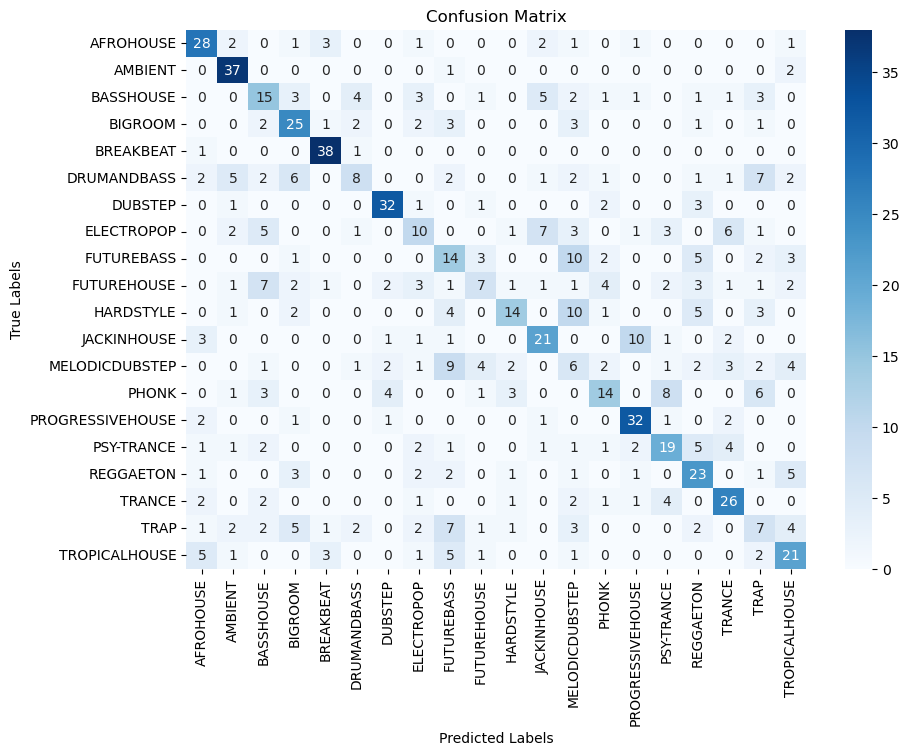

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load TRAIN and TEST data from .xlsx files
traindata = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TRAIN.xlsx")
testData = pd.read_excel(r"C:\Users\ashut\Documents\GitHub\edm-subgenre-classification\TEST.xlsx")


# Remove any non-numeric columns
xTrain = traindata.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
yTrain = traindata['Genre']

xTest = testData.select_dtypes(include=[float, int]).drop('Genre', axis=1, errors='ignore')
yTest = testData['Genre']
# Encode the Genre labels as numerical values
label_encoder = LabelEncoder()
yTrain = label_encoder.fit_transform(yTrain)
yTest = label_encoder.transform(yTest)

# Standardize the feature values (important for many ML models)
scaler = StandardScaler()
X_TrainScaling  = scaler.fit_transform(xTrain)
X_TestScaling = scaler.transform(xTest)

# Train a Neural Network with epochs
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_TrainScaling , yTrain)

# Predict on the TEST set
yPrediction = model.predict(X_TestScaling)

# Evaluate the model
accuracy = accuracy_score(yTest, yPrediction)
print(f"Accuracy on test set: {accuracy:.4f}")

# Show detailed classification report
print("\nClassification Report:")
print(classification_report(yTest, yPrediction, target_names=label_encoder.classes_))


Train columns:  Index(['zcr', 'energy', 'energy_entropy', 'spectral_centroid',
       'spectral_spread', 'spectral_entropy', 'spectral_flux',
       'spectral_rolloff', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5',
       'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'chroma_12', 'chroma_std', 'delta zcr', 'delta energy',
       'delta energy_entropy', 'delta spectral_centroid',
       'delta spectral_spread', 'delta spectral_entropy',
       'delta spectral_flux', 'delta spectral_rolloff', 'delta mfcc_1',
       'delta mfcc_2', 'delta mfcc_3', 'delta mfcc_4', 'delta mfcc_5',
       'delta mfcc_6', 'delta mfcc_7', 'delta mfcc_8', 'delta mfcc_9',
       'delta mfcc_10', 'delta mfcc_11', 'delta mfcc_12', 'delta mfcc_13',
       'delta chroma_1', 'delta chroma_2', 'delta chroma_3', 'delta chroma

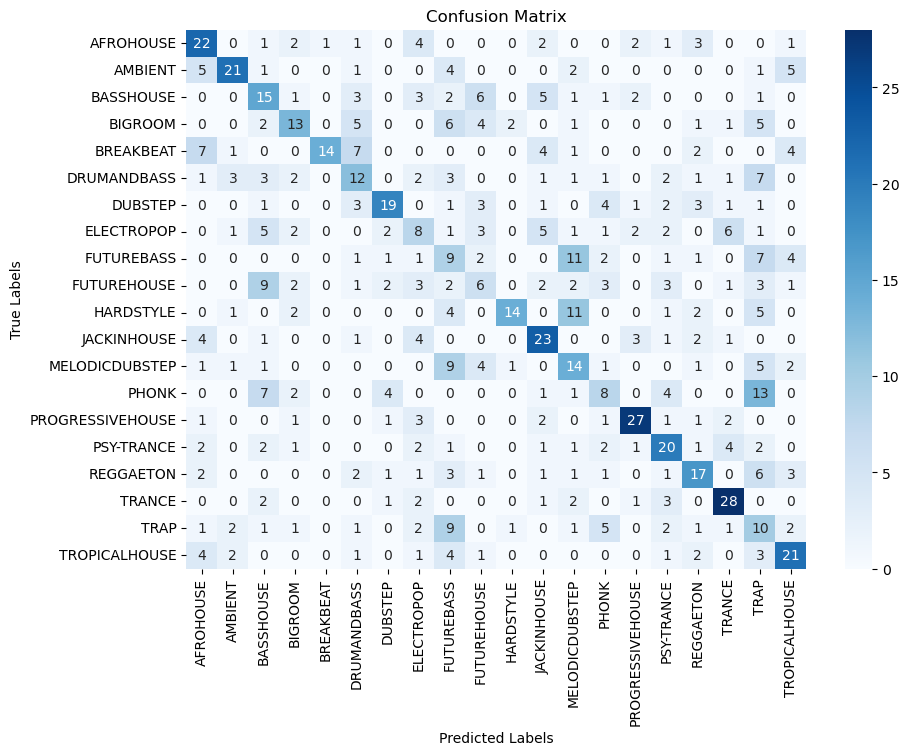

In [8]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [11]:
import pandas as pd

# Assuming feature_means is your dictionary
feature_means = {name: F[i, :].mean() for i, name in enumerate(f_name)}

# Convert the dictionary to a DataFrame and transpose
df = pd.DataFrame([feature_means])

# Export to Excel with a new file name
df.to_excel('feature_means_new.xlsx', index=False)

print("Data exported to 'feature_means_new.xlsx'")


Data exported to 'feature_means_new.xlsx'


In [14]:
from pyAudioAnalysis import MidTermFeatures
BPM, _ = MidTermFeatures.beat_extraction(F, 0.5)
print(f"Estimated BPM: {BPM}")


Estimated BPM: 30.0


In [8]:
pip install librosa

   ---------------------------------------- 0.0/260.1 kB ? eta -:--:--
   ------- -------------------------------- 51.2/260.1 kB 2.6 MB/s eta 0:00:01
   -------------------------- ------------- 174.1/260.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 260.1/260.1 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.6 kB ? eta -:--:--
   ---------------------------------------- 64.6/64.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------- ----------------------- 0.4/1.0 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/164.9 kB ? eta -:--:--
   ---------------------------------------- 164.9/164.9 kB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Estimated BPM: [143.5546875]


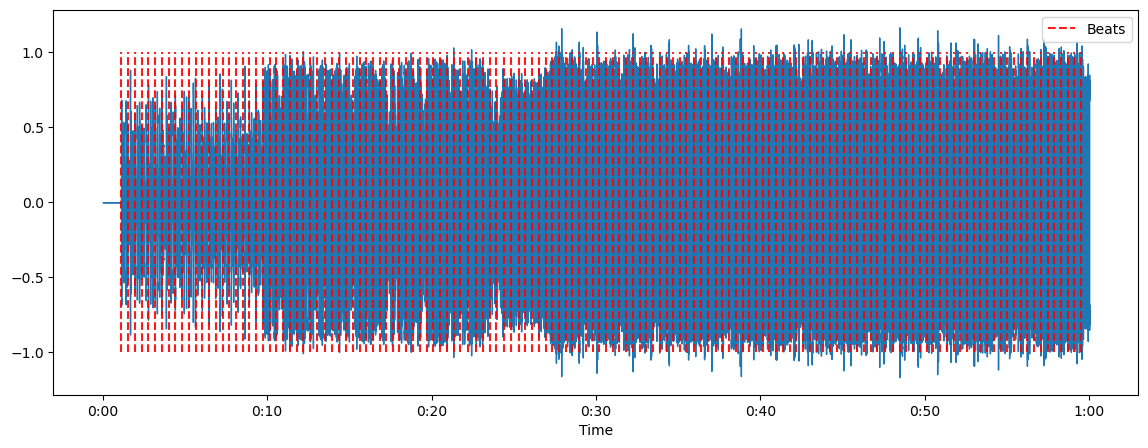

In [16]:
import matplotlib.pyplot as plt
import librosa

y, sr = librosa.load(audio_file_path, duration=60)

# Estimate the tempo (BPM)
tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
print(f"Estimated BPM: {tempo}")


# Plot the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

# Plot the detected beats
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beats, sr=sr)
plt.vlines(beat_times, -1, 1, color='r', alpha=0.9, linestyle='--', label='Beats')
plt.legend()
plt.show()

In [17]:
# !pip install cython
!pip install madmom


In [18]:
!pip install --upgrade madmom

In [19]:
!pip install six

In [ ]:
import librosa

def get_bpm_librosa(audio_file_path):
    y, sr = librosa.load(audio_file_path)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    tempo, _ = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr)
    return tempo

# Example usage
audio_file_path = '/home/ashwathama/mr/pyAudioAnalysis-1/pyAudioAnalysis/bangarang.mp3'
bpm = get_bpm_librosa(audio_file_path)
print(f'The estimated BPM is: {bpm}')


The estimated BPM is: [112.34714674]


In [ ]:
pip install pyaudioanalysis

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pydub import AudioSegment

# Load MP3 file
audio = AudioSegment.from_mp3("/home/ashwathama/mr/pyAudioAnalysis-1/pyAudioAnalysis/bangarang.mp3")

# Export as WAV file
audio.export("/home/ashwathama/Desktop/bangarang.wav", format="wav")

<_io.BufferedRandom name='/home/ashwathama/Desktop/bangarang.wav'>

In [27]:
import aubio
import os

def get_bpm_aubio(audio_file_path):
    # Ensure the file path is correct and file exists
    if not os.path.isfile(audio_file_path):
        raise FileNotFoundError(f"File not found: {audio_file_path}")

    # Parameters for Aubio
    win_s = 512          # Window size for tempo detection
    hop_s = win_s // 2   # Hop size (overlap size)
    samplerate = 0       # Use 0 to let Aubio determine the samplerate

    # Create a tempo detection object
    tempo = aubio.tempo("default", win_s, hop_s, samplerate)
    
    # Load the WAV file
    source = aubio.source(audio_file_path, samplerate, hop_s)

    # Initialize variables for BPM calculation
    bpm = 0
    total_frames = 0
    beat_count = 0  # Counter for beats
    
    # Process the audio file
    while True:
        samples, read = source()
        is_beat = tempo(samples)
        if is_beat:
            beat_count += 1
            bpm = tempo.get_bpm()
        total_frames += read
        if read < hop_s:
            break

    return bpm if beat_count > 0 else "No beats detected"

# Example usage
audio_file_path = '/home/ashwathama/Desktop/bangarang.wav'  # Ensure this path is correct
try:
    bpm = get_bpm_aubio(audio_file_path)
    print(f'The estimated BPM is: {bpm}')
except Exception as e:
    print(f"An error occurred: {e}")

The estimated BPM is: 111.07464599609375


somewhat close to the actual bpm

In [1]:
pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client

#google api for Google drive and client 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 949.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 26.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 15.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
